In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**Data Loading and Understanding**

In [2]:
df=pd.read_csv('Customer_churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)  #seperate each line of o/p by -

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#TotalCharges is in object but contain numeric value so we need to change this to float
#this column have space it consider this as string
df[df["TotalCharges"]==" "]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
len(df[df["TotalCharges"]==" "])

11

In [13]:
#converting empty spce to string value 
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [14]:
#now convert the col into float
df["TotalCharges"] = df["TotalCharges"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
# checking the class distribution of target column
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**Data Preprocessing**

In [16]:
#Label encoding of target column
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

C:\Users\Hp\AppData\Local\Temp\ipykernel_2292\1384506168.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [17]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [18]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [19]:
#Label encoding of categorical fetaures
#identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [20]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [21]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [22]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [24]:
df.to_csv('cust_preprocessed_data.csv')

**UNIVARIANT_ANALYSIS**

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.00,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.00,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.00,1.00,2.00,2.00
OnlineBackup,7043.0,0.906432,0.880162,0.00,0.00,1.00,2.00,2.00


In [26]:
#splitting categorial and numerical datatype columns
def quanQual(df):
    quan=[]
    qual=[]
    for columname in df.columns:
        if (df[columname].dtype=='O'):
            qual.append(columname)
        else:
            quan.append(columname)
    return quan,qual    

In [28]:
quan,qual =quanQual(df)

In [29]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max","skew","kurtosis","variance","std_div"],columns=quan)
for columnName in quan:
        descriptive.loc["Mean", columnName] = df[columnName].mean()
        descriptive.loc["Median", columnName] = df[columnName].median()
        descriptive.loc["Mode", columnName] = df[columnName].mode()[0]
        descriptive.loc["Q1:25%", columnName] = df.describe()[columnName]["25%"]
        descriptive.loc["Q2:50%", columnName] = df.describe()[columnName]["50%"]
        descriptive.loc["Q3:75%", columnName] = df.describe()[columnName]["75%"]
        descriptive.loc["99%", columnName] = np.percentile(df[columnName],99)
        descriptive.loc["Q4:100%", columnName] = df.describe()[columnName]["max"]
        descriptive.loc["IQR", columnName] = descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
        descriptive.loc["1.5rule", columnName] = 1.5*descriptive[columnName]["IQR"]
        descriptive.loc["Lesser", columnName] = descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
        descriptive.loc["Greater", columnName] =descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
        descriptive.loc["Min", columnName] = df[columnName].min()
        descriptive.loc["Max", columnName] = df[columnName].max()
        descriptive.loc["skew", columnName] = df[columnName].skew()
        descriptive.loc["kurtosis", columnName] = df[columnName].kurtosis()
        descriptive.loc["variance", columnName] = df[columnName].var()
        descriptive.loc["std_div", columnName] = df[columnName].std()

In [30]:
descriptive

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.26537
Median,1.0,0.0,0.0,0.0,29.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,70.35,1394.55,0.0
Mode,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,20.05,0.0,0
Q1:25%,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.5,398.55,0.0
Q2:50%,1.0,0.0,0.0,0.0,29.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,70.35,1394.55,0.0
Q3:75%,1.0,0.0,1.0,1.0,55.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,89.85,3786.6,1.0
99%,1.0,1.0,1.0,1.0,72.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,114.729,8039.256,1.0
Q4:100%,1.0,1.0,1.0,1.0,72.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,118.75,8684.8,1.0
IQR,1.0,0.0,1.0,1.0,46.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,54.35,3388.05,1.0
1.5rule,1.5,0.0,1.5,1.5,69.0,0.0,3.0,1.5,3.0,3.0,3.0,3.0,3.0,3.0,1.5,1.5,1.5,81.525,5082.075,1.5


In [31]:
#checking whether any column data lies under or above lesser,greater values
lesser=[]
greater=[]

for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)

In [32]:
lesser

['PhoneService']

In [33]:
greater

['SeniorCitizen']

In [34]:
#again run the descriptive and check lesser and greater
#function created for overall stats
def Univariate(df,quan):
    descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max","skew","kurtosis","variance","std_div"],columns=quan)
    for columnName in quan:
        descriptive.loc["Mean", columnName] = df[columnName].mean()
        descriptive.loc["Median", columnName] = df[columnName].median()
        descriptive.loc["Mode", columnName] = df[columnName].mode()[0]
        descriptive.loc["Q1:25%", columnName] = df.describe()[columnName]["25%"]
        descriptive.loc["Q2:50%", columnName] = df.describe()[columnName]["50%"]
        descriptive.loc["Q3:75%", columnName] = df.describe()[columnName]["75%"]
        descriptive.loc["99%", columnName] = np.percentile(df[columnName],99)
        descriptive.loc["Q4:100%", columnName] = df.describe()[columnName]["max"]
        descriptive.loc["IQR", columnName] = descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
        descriptive.loc["1.5rule", columnName] = 1.5*descriptive[columnName]["IQR"]
        descriptive.loc["Lesser", columnName] = descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
        descriptive.loc["Greater", columnName] =descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
        descriptive.loc["Min", columnName] = df[columnName].min()
        descriptive.loc["Max", columnName] = df[columnName].max()
        descriptive.loc["skew", columnName] = df[columnName].skew()
        descriptive.loc["kurtosis", columnName] = df[columnName].kurtosis()
        descriptive.loc["variance", columnName] = df[columnName].var()
        descriptive.loc["std_div", columnName] = df[columnName].std()
    return descriptive
    

In [35]:
descriptive=Univariate(df,quan)
descriptive

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.26537
Median,1.0,0.0,0.0,0.0,29.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,70.35,1394.55,0.0
Mode,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,20.05,0.0,0
Q1:25%,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.5,398.55,0.0
Q2:50%,1.0,0.0,0.0,0.0,29.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,70.35,1394.55,0.0
Q3:75%,1.0,0.0,1.0,1.0,55.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,89.85,3786.6,1.0
99%,1.0,1.0,1.0,1.0,72.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,114.729,8039.256,1.0
Q4:100%,1.0,1.0,1.0,1.0,72.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,118.75,8684.8,1.0
IQR,1.0,0.0,1.0,1.0,46.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,54.35,3388.05,1.0
1.5rule,1.5,0.0,1.5,1.5,69.0,0.0,3.0,1.5,3.0,3.0,3.0,3.0,3.0,3.0,1.5,1.5,1.5,81.525,5082.075,1.5


In [36]:
lesser=[]
greater=[]

for columnName in quan:
    if(descriptive[columnName]["Lesser"]>descriptive[columnName]["Min"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Greater"]<descriptive[columnName]["Q4:100%"]):
        greater.append(columnName) 

In [37]:
lesser

['PhoneService']

In [38]:
greater

['SeniorCitizen']

**BIVARIANT_ANALYSIS**

In [39]:
#covariance calculation
df[quan].cov()
#correlation calculation
df[quan].corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


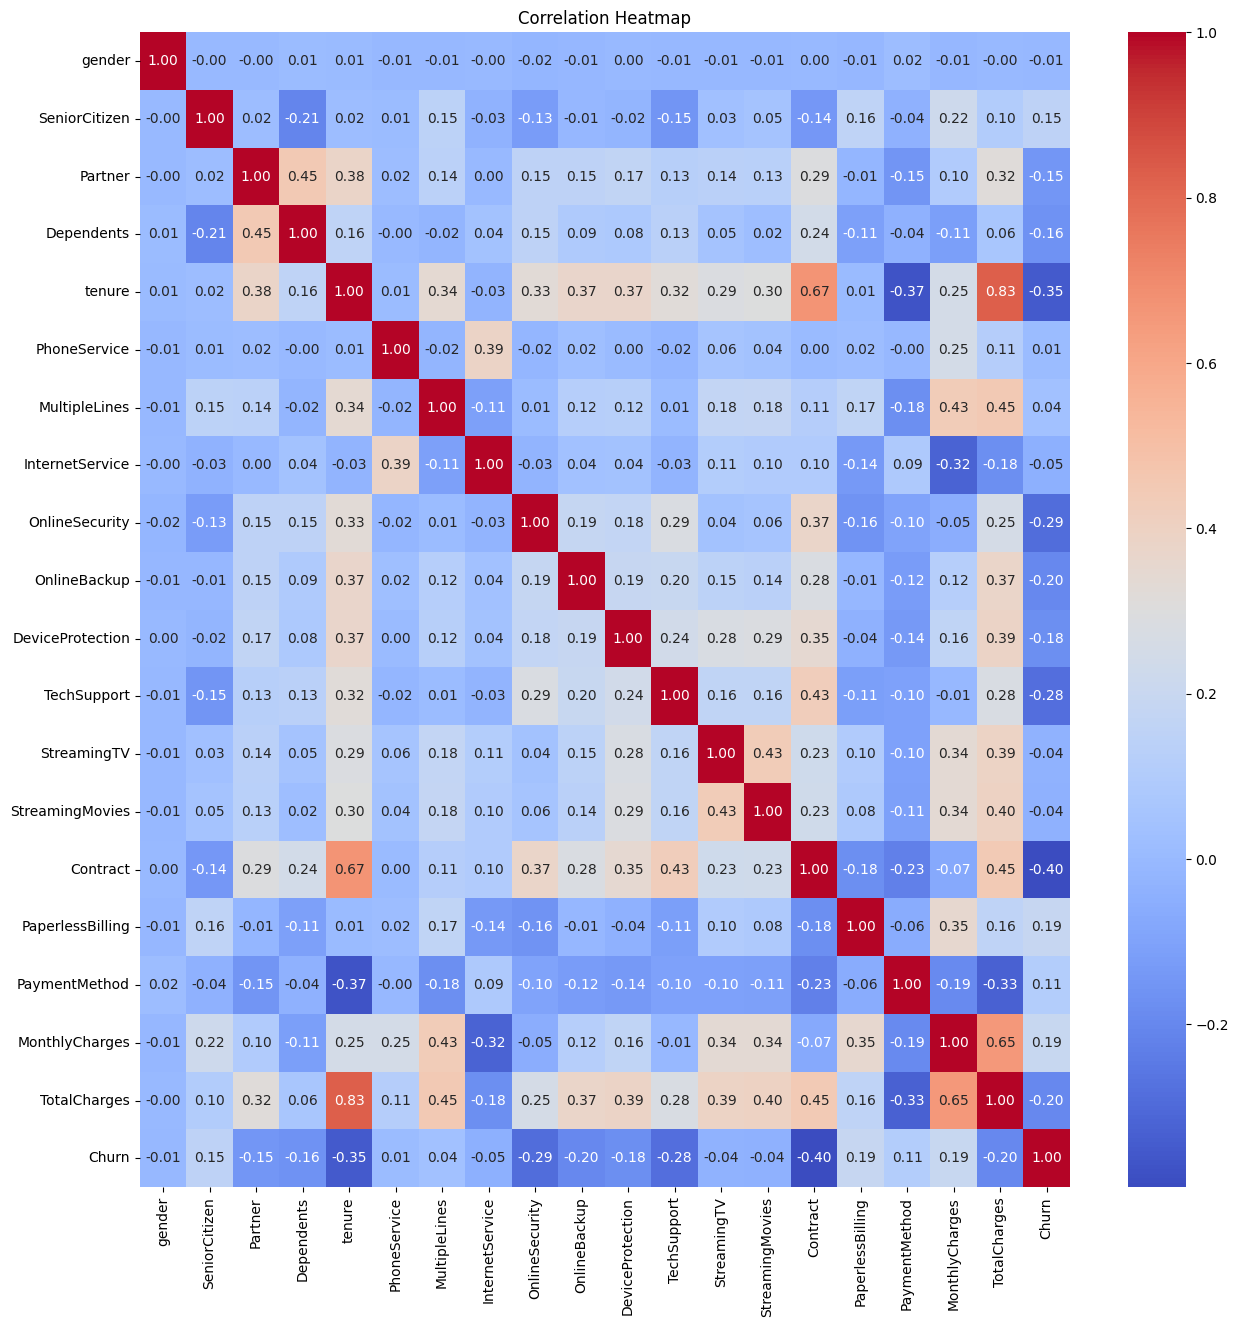

In [40]:
# correlation matrix - heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

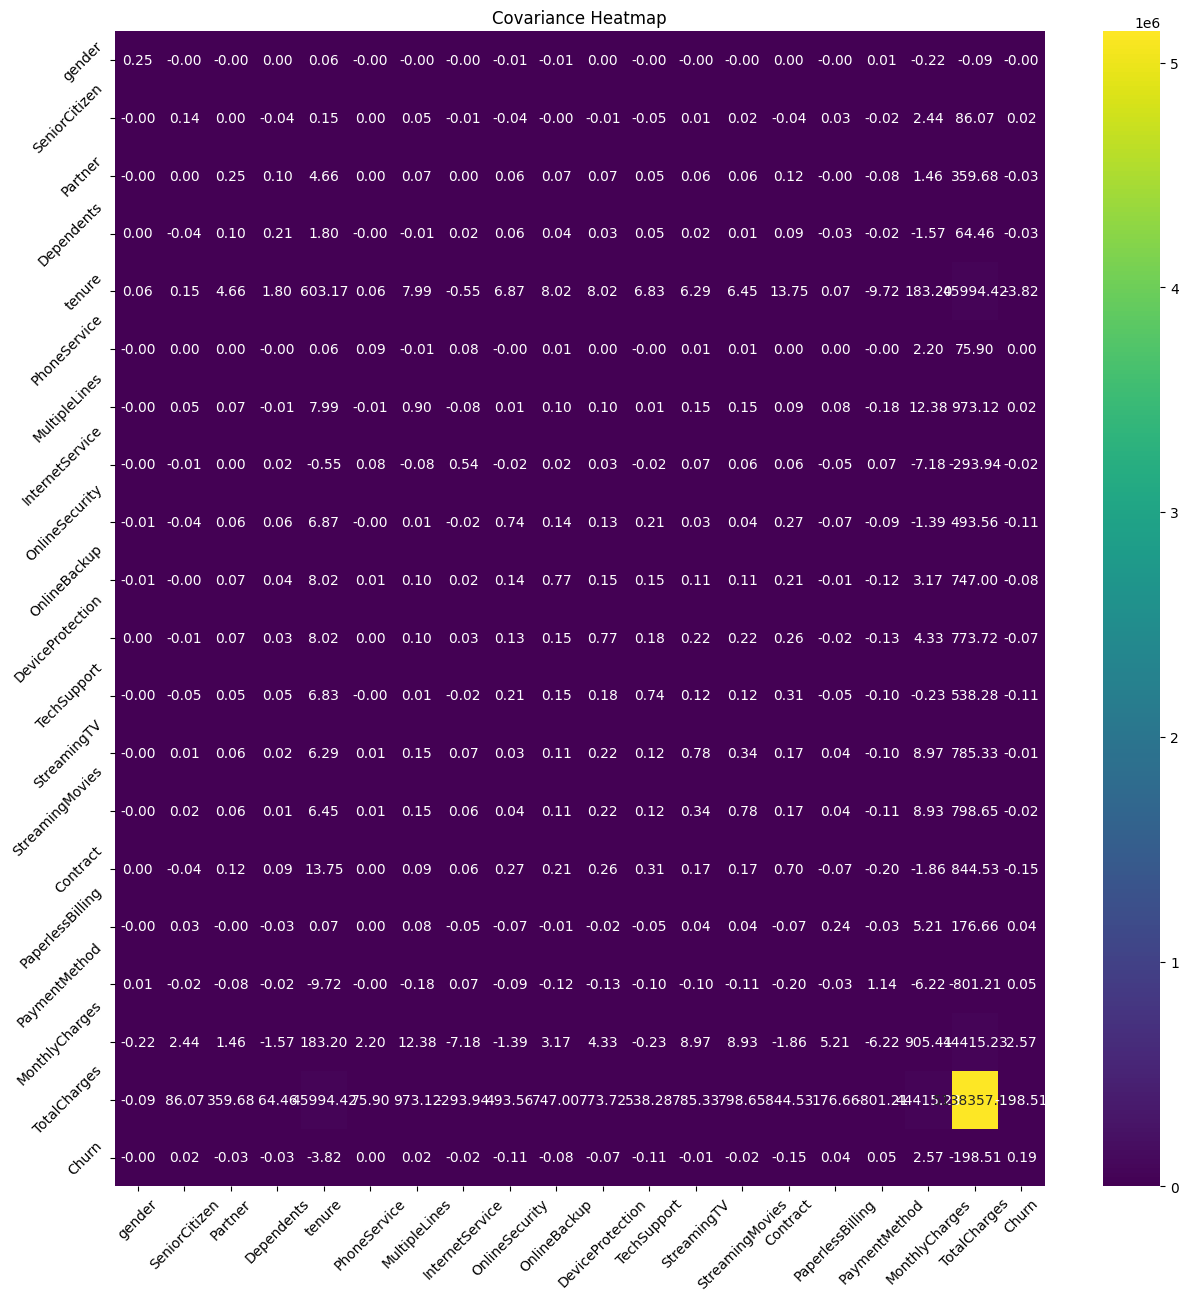

In [41]:
# Plot covariance heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.cov(), annot=True, fmt=".2f", cmap="viridis")
plt.title("Covariance Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

**FEATURE_SELECTION**

In [42]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [43]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Synthetic Minority Oversampling TEchnique (SMOTE)**

In [44]:
from imblearn.over_sampling import SMOTE


In [45]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train_smote.shape)
y_train_smote.value_counts()

(8276,)


Churn
0    4138
1    4138
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import warnings
warnings.filterwarnings("ignore")



In [47]:
# dictionary of models
models = {
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Dictionary to store cross-validation results
cv_scores = {}
model_reports = {}

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    
    # Cross-validation score for accuracy
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    
    # Train the model on the entire dataset and predict on the test set
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)  # assuming X_test is your test data
    
    # Compute confusion matrix, accuracy, and classification report
    cm = confusion_matrix(y_test, y_pred)  # assuming y_test is your test labels
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Save the results
    model_reports[model_name] = {
        "Confusion Matrix": cm,
        "Accuracy": accuracy,
        "Classification Report": report
    }

    # Print cross-validation accuracy and the confusion matrix, accuracy, and classification report
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}")
    print("-" * 70)


Training Logistic Regression with default parameters
Logistic Regression cross-validation accuracy: 0.79
Confusion Matrix:
[[791 245]
 [ 84 289]]
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1036
           1       0.54      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409

----------------------------------------------------------------------
Training K-Nearest Neighbors with default parameters
K-Nearest Neighbors cross-validation accuracy: 0.77
Confusion Matrix:
[[749 287]
 [112 261]]
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1036
           1       0.48      0.70      0.57       373

    accuracy                           0.72      1409
   macro avg    

In [64]:
cv_scores

{'Logistic Regression': array([0.73429952, 0.74622356, 0.8265861 , 0.81510574, 0.83444109]),
 'K-Nearest Neighbors': array([0.75120773, 0.76012085, 0.78247734, 0.78851964, 0.77522659]),
 'Naive Bayes': array([0.7071256 , 0.7347432 , 0.80966767, 0.79214502, 0.80664653]),
 'Decision Tree': array([0.69202899, 0.70574018, 0.82537764, 0.83806647, 0.84350453]),
 'Random Forest': array([0.73067633, 0.77039275, 0.90392749, 0.89969789, 0.90030211]),
 'XGBoost': array([0.70833333, 0.76132931, 0.90453172, 0.88821752, 0.90755287])}

**Random Forest gives the highest accuracy compared to other models with default parameters**

In [58]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote, y_train_smote)
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

In [60]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7785663591199432
Confsuion Matrix:
 [[878 158]
 [154 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [61]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [62]:
# load teh saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [63]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.79 0.21]]
